In [36]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt



# Logistic Regression

In [47]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

In [48]:
df = pd.read_csv("/content/drive/MyDrive/CEG/SEM 2/ML/Lab 2/students - students - students - students.csv")
df.head()

,Rollnumber,Name,English,Maths,Science,Evs,Cse,Total,Attendance,Category
0,2.020000e+09,Anirudh,100,100,100,100,100,100.0,100,1
1,2.020000e+09,Murali,96,44,88,71,72,74.2,95,1
2,2.020000e+09,Jivi,57,58,63,63,69,62.0,76,0
3,2.020000e+09,Srijith,50,82,47,93,97,73.8,90,1
4,2.020000e+09,Naufel,40,46,41,74,63,52.8,70,0


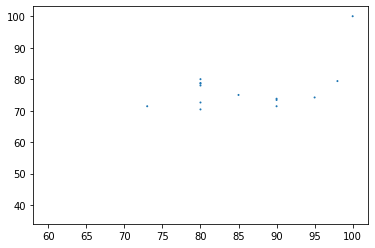

In [62]:
plt.scatter(df['Attendance'],df['Total'],df['Category'])

In [50]:
to_drop=['English', 'Maths', 'Evs', 'Cse', 'Science', 'Rollnumber']
df.drop(to_drop, inplace=True, axis=1)
df.head()

,Name,Total,Attendance,Category
0,Anirudh,100.0,100,1
1,Murali,74.2,95,1
2,Jivi,62.0,76,0
3,Srijith,73.8,90,1
4,Naufel,52.8,70,0


Total         1.000000
Category      0.763093
Attendance    0.696184
Name: Total, dtype: float64


<AxesSubplot:>

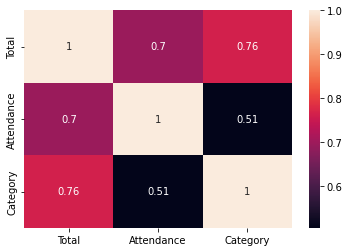

In [51]:
correlation = df.corr()
print(correlation["Total"].sort_values(ascending=False))

sns.heatmap(data=correlation, annot=True)

In [58]:
X = df[['Total','Attendance']]
y = df['Category']


X_train, X_test , y_train, y_test = train_test_split(X,y, test_size = 0.20, random_state = 0)


In [59]:
model = LogisticRegression(solver='liblinear', random_state=0)
model.fit(X_train, y_train)


LogisticRegression(random_state=0, solver='liblinear')

In [70]:
y_pred = model.predict(X_test)
df1 = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df1

,Actual,Predicted
2,0,0
28,0,0
13,0,0
10,1,1
26,0,1
24,0,0


In [71]:
mse = (mean_absolute_error(y_test, y_pred))
print("MAE:",mse)

rmse = (np.sqrt(mean_squared_error(y_test, y_pred)))
print("RMSE:",rmse)

r2 =  r2_score(y_test, y_pred)
print("R-Square:",r2)

MAE: 0.16666666666666666
RMSE: 0.408248290463863
R-Square: -0.19999999999999973


In [72]:
model.score(X_test,y_test)*100


83.33333333333334

In [87]:
score = int(input("Enter the Score : "))
atten = int(input("Enter the Atten % : "))

# atten = atten.reshape(-1,1)
own_pred = model.predict([[score,atten]])
print("if the score is  = {}".format(float(score)))
print("then the category is = {}".format(round(own_pred[0],2)))

Enter the Score : 60
Enter the Atten % : 74
if the score is  = 60.0
then the category is = 0


/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
